1.Implementation of Multiple Linear Regression for House Price Prediction using sklearn .

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing()

# Convert to a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target column
df['Price'] = housing.target

# Display the first 5 rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Independent variables
X = df.drop('Price', axis=1)

# Dependent variable
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R2 Score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Mean Squared Error: 0.5305677824766758
R2 Score: 0.595770232606166
             Coefficient
MedInc      4.458226e-01
HouseAge    9.681868e-03
AveRooms   -1.220951e-01
AveBedrms   7.785996e-01
Population -7.757404e-07
AveOccup   -3.370027e-03
Latitude   -4.185367e-01
Longitude  -4.336880e-01


2.Implementation of Decision tree using sklearn and its parameter tuning

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create model
dt_model = DecisionTreeRegressor(random_state=42)

# Train model
dt_model.fit(X_train, y_train)

# Prediction
y_pred = dt_model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.5280096503174904
R2 Score: 0.5977192261218356


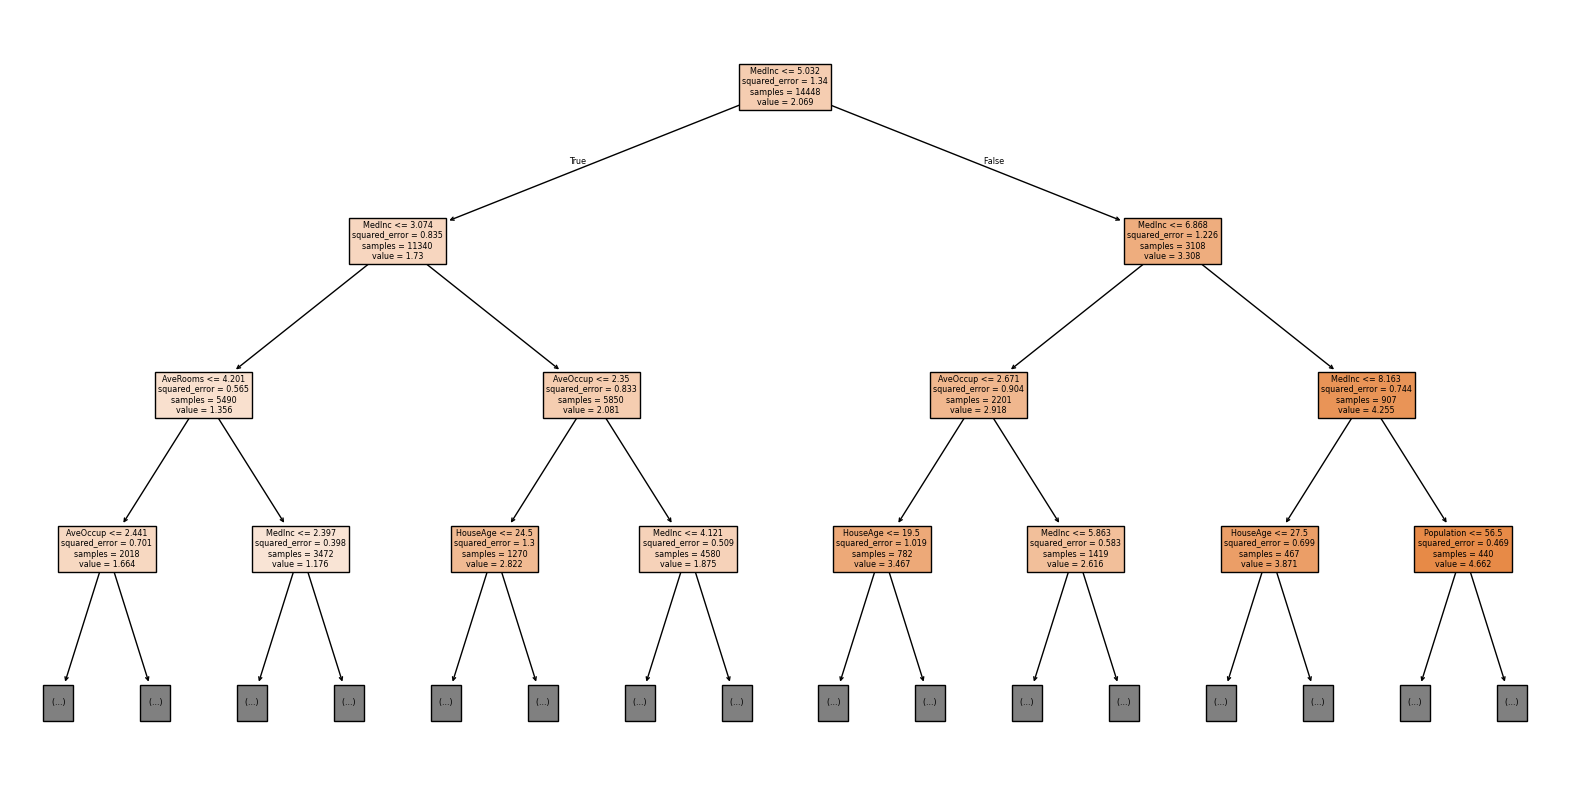

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    max_depth=3   # limit depth for clarity
)
plt.show()

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid for regression
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

# Grid Search with Decision Tree Regressor
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)

# Train
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Best model
best_model = grid_search.best_estimator_

# Prediction
y_pred_best = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("Tuned Mean Squared Error:", mse)
print("Tuned R2 Score:", r2)

Tuned Mean Squared Error: 0.4259716140103836
Tuned R2 Score: 0.6754601162475162
